<h3>Stool microbiome and obesity </h3>

The microbiome refers to all the microorganisms that live on or within the human body. Microorganisms can be found thriving in many sites of the body, including the skin, uterus, mouth and gastrointestinal tract. In fact it is estimated that there are more bacteria than cells in the human body, thus it is not surprising that studies have shown the microbiome has a significant impact on physical and even mental health. We have so much interdependence with the bacteria living on or in us, some studies have shown that the species composition of the gut microbiome is associated with many diseases, from cancer to metabolic syndrome. There is crosstalk between our body and the microbiome, our lifestyles and habits can alter the communities of our microbiome; their diversity and composition in turn affect our health.

My graduate research was on microbiology so I am quite interested in the correlation between the  composition of an individual's stool microbiome and their physical status, especially if any genus/species of bacteria that are important for the prediction of obesity. 

The dataset I'm using is a human metagenomics dataset from Kaggle which can be found [here](https://www.kaggle.com/antaresnyc/human-metagenomics?select=abundance_stoolsubset.csv). Credits for the data go to the original authors of the study and Kaggle user Alexey Kotlik who uploaded it.

In [1]:
### import packages ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### import raw data

data = pd.read_csv('metagenomics/abundance_stoolsubset.csv', dtype='str')
cols = data.columns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Let's take a look at the raw data

print('sample dimensions are {} rows by {} columns'.format(data.shape[0], data.shape[1]))
print()
data.head(2)

sample dimensions are 1989 rows by 2339 columns



,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


This dataset is pretty high dimensional with 2339 columns, but most of the columns are not really relevant to what I'm doing. Gender, age and country is available too, which gives me an idea to try something similar to this but see if I can differentiate gender or location based on microbiome. But that'll be something for the future.

Since I'm interested in obesity, I'll filter for that data with indicators of obesity and normal weight individuals. I got my BMI categories here from [NIH](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm), which is:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Underweight</th>
    <th class="tg-c3ow">&lt;18.5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">Normal weight</td>
    <td class="tg-c3ow">18.5-24.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Overweight</td>
    <td class="tg-c3ow">25-29.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Obesity</td>
    <td class="tg-c3ow">&gt;=30</td>
  </tr>
</tbody>
</table>

In the cell below, I drop the columns which I won't be using, except for some that identifies where the sample is from. I won't be using data from individuals with other diseases, only those who are healthy or obese, so as to not add any confounding variables or other complications in the modeling.

In [3]:
### preprocess data ###

# filter for categories of interest

processed = data[data['disease'].isin(['obesity', 'obese', 'overweight','leaness', 'n'])].copy()

# drop columns that are not needed
to_drop = list(cols[2:4]) + list(cols[8:20]) + list(cols[21:211])
processed.drop(columns = to_drop, inplace = True)

# remove samples without bmi, convert bmi and abundance to float and filter for regular weight and obese
processed = processed[~processed['bmi'].isin(['na', 'nd'])]

processed['bmi'] = pd.to_numeric(processed['bmi'], downcast ='float')

# processed.iloc[:, 7:] = processed.iloc[:, 7:].apply(pd.to_numeric)

processed.iloc[:, 7:] = processed.iloc[:, 7:].astype(np.float32)
# create labels for classification

bmi = [(processed['bmi'] >= 18.5) & (processed['bmi'] < 25), (processed['bmi'] >= 25) & (processed['bmi'] < 30), processed['bmi'] >= 30 ]

categories = ['1','2','3']

classes = np.select(bmi, categories, default = '0')

np.unique(classes, return_counts=True)

(array(['0', '1', '2', '3'], dtype='<U1'),
 array([ 35, 444, 177, 309], dtype=int64))

There are too little observations for underweight data compared to the others, which will probaly affect the modeling accuracy. Since I'm mostly curious about the microbiome composition of regular and obese individuals (1 and 3), I'll just drop the other categories and make this a simpler binary classification problem.

In [4]:
bmi = [(processed['bmi'] >= 18.5) & (processed['bmi'] < 25), processed['bmi'] >= 30 ]

categories = ['0','1']

processed['bmi_category'] = np.select(bmi, categories, default = '2')

Now for some data cleaning, I also noticed some "redundancy" in the relative abdundance data which should be removed after the initial data cleaning:

The relative abundance for every species is recorded multiple times in the data, as an example, let's look at the data for Archaea bacteria for the $6^{th}$ observation

In [35]:
processed.iloc[5, 7:16]

k__Archaea                                                                                                                                                                                     0.4308
k__Archaea|p__Euryarchaeota                                                                                                                                                                    0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                                                                 0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                                                           0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae                                                                                                    0.4308
k__Archaea

The first letter of column names represents taxonomic rank. For example, "k\_Archaea" in the output above stands for the kingdom of [Archaea](https://en.wikipedia.org/wiki/Archaea) and sum abundance of all bacteria from this kingdom is 0.4308. In row 2, "k_Archaea|p_Euryarchaeota" referes to the phylum of Euryarchaeota within the Archaea kingdom. (See [Bacteria Taxonomy](https://en.wikipedia.org/wiki/Bacterial_taxonomy)). Since I'm interested at the species level, I'll remove columns of other taxonomic ranks.

We can see that for this data point, only 2 species were detected, *M.smithii* and a unclassified methanobrevibacter, at 0.3816 and 0.04919 abundance respectively. And both values add up to 0.4308, which confirms that I'm not reading the data wrong.

I'll use regex to find column names that contain species level abundance and filter the other columns. And since I'm already filtering at the species level anyways, I'm quite curious to study genus level data as well, so I'll filter for those too. But different species of bacteria within the same genus can have different biochemistry and life cycles, so it is likely that genus will not be as good a predictor.

In [5]:
# get names of all columns that contain abundance data
bacteria = list(processed.columns)[7:-1]

# use regex to select exclusively for columns that contain species level abundance

# filters for species level
s = re.compile(r'(\|s__\w+$)')

# filter for genus level
g = re.compile(r'\|g__\w+$')


not_species = [i for i in bacteria if not s.search(i)]
not_genus = [j for j in bacteria if not g.search(j)]

# drop columns that are not needed
species_data = processed[processed['bmi_category'] != '2'].drop(columns = not_species)

genus_data = processed[processed['bmi_category'] != '2'].drop(columns = not_genus)

print('New dimensions of the dataset:')
print()
print('Species level dataset: {} rows by {} cols'.format(species_data.shape[0], species_data.shape[1]))
print()
print('Genus level dataset: {} rows by {} cols'.format(genus_data.shape[0], genus_data.shape[1]))


New dimensions of the dataset:

Species level dataset: 753 rows by 834 cols

Genus level dataset: 753 rows by 300 cols


Next is to shorten the feature names into something more readable:

In [6]:
# rename feature names to shorter ones for species

s = re.compile(r's__(\w+)')

short = []

for i in list(species_data)[7:-1]:
    short.append(s.search(i).group(1).replace("_", " "))
    
new = dict(zip(species_data, list(species_data)[:7] + short))

species_data.rename(columns = new, inplace=True)

# same thing for genus

g = re.compile(r'g__(\w+)')

short = []

for i in list(genus_data)[7:-1]:
    short.append(g.search(i).group(1).replace("_", " "))
    
new = dict(zip(genus_data, list(genus_data)[:7] + short))

genus_data.rename(columns = new, inplace=True)

# convert numberic datatypes
cols = species_data.columns[7:-1]

species_data[cols] = species_data[cols].apply(pd.to_numeric)

# same for genus data, whether I'll eventually use it or not
cols = genus_data.columns[7:-1]

genus_data[cols] = genus_data[cols].apply(pd.to_numeric)

Now for a sanity check on the data, first for missing values. Also, since this is a relative abundance dataset, the total values in each observation should add up to 100.

In [7]:
# quick and dirty missing value check

print('there are {} missing values in species and {} in genus.'.format(species_data.isna().sum().sum(), genus_data.isna().sum().sum()))

there are 0 missing values in species and 0 in genus.


In [74]:
# a list to collect index of observations that add up to 0 or more than 100
gt = []
lt = []
for i in range(len(species_data)):
    if (species_data.iloc[i, 7:-1].sum() > 100):
        gt.append(i)
    elif species_data.iloc[i, 7:-1].sum() < 100:
        lt.append(i)

print('{} observations >100% and {} observations <100% to check'.format(len(gt), len(lt)))


114 observations >100% and 639 observations <100% to check


That's a lot of observations with issues, let's take a look at those that add up to less than 100 first.

In [ ]:
for i in np.random.randint(0, len(lt), size=10):
    print('row {}, total abundance {}'.format(lt[i], species_data.iloc[lt[i], 7:-1].sum()))


And those that add up to more than 100

In [ ]:
for i in np.random.randint(0, len(gt), size=10):
    print('row {}, total abundance {}'.format(gt[i], species_data.iloc[gt[i], 7:-1].sum()))

It seems like the issue is due to floating point imprecision or rounding errors which shouldn't affect the modeling

</br>.
</br>

### Finding bacteria species that are distributed differently in normal and obese individuals ###

Now that I'm happy with the state of the data, let's take a deeper look into the data.

I'm thinking of exploring this dataset in this manner: 

First, let's see if we can find species whose distributions differ between normal and obese individuals. Since the data is mostly sparse and not normally distributed, I'll use the Mann-Whitney U test, with $H_0$ being that a bacteria species does not differ in its distributions between both categories. I'm assuming any species that does not differ between the two categories will not be helpful in differentiating the individuals and the results can be used as a form of feature selection to cut down on the variables. Hence I'll drop all species with p-values > 0.01. This dataset contains 826 species of bacteria (i.e predictors), using the all-time fan favorite cutoff of 0.05 would mean ~41 species are included by chance, hence I decided to use 0.01 instead.

Next, I will train models using *both* the smaller, feature selected dataset and the complete dataset. This serves two purposes:

1. I want to see if the "feature selection" I'm doing here will improve model performance
2. Using the feature importance function of the models, I'd like to see if the features identified here will coincide with those selected by the models.



To be honest though, there are sufficient samples such that n is only slightly less than p and modern machine learning models will probably produce pretty good results regardless of whether I'm using the entire dataset or the smaller one. But where's the fun in just cleaning the data and then calling model.fit() without some experimenting right?


In [8]:
def calculate_mann_whitney(df, category_column):
    '''calculates mann_whitney U 
    Assumes the data has only 2 classes, 1 and 0 and the final column
    '''

    from scipy.stats import mannwhitneyu
    
    # dictionary to collect data
    variables = {}

    # slice data
    class0 = df[df[category_column] == '0']
    class1 = df[df[category_column] == '1']

    # columns
    cols = list(df.columns)
    cols.remove(category_column)

    for i in cols:

        u = mannwhitneyu(class0[i], class1[i])

        variables[i]= {'statistic': u[0], 'p-value':u[1]}


    return pd.DataFrame.from_dict(variables, orient='index')

In [9]:
mw = calculate_mann_whitney(species_data.iloc[:, 7:], 'bmi_category')

# filter for species with p-values <0.01
mw_sig = mw[mw['p-value'] < 0.01].sort_values(by='statistic', ascending=False)


Now let's take a look at the distributions of the 10 species with highest MWU statistic.

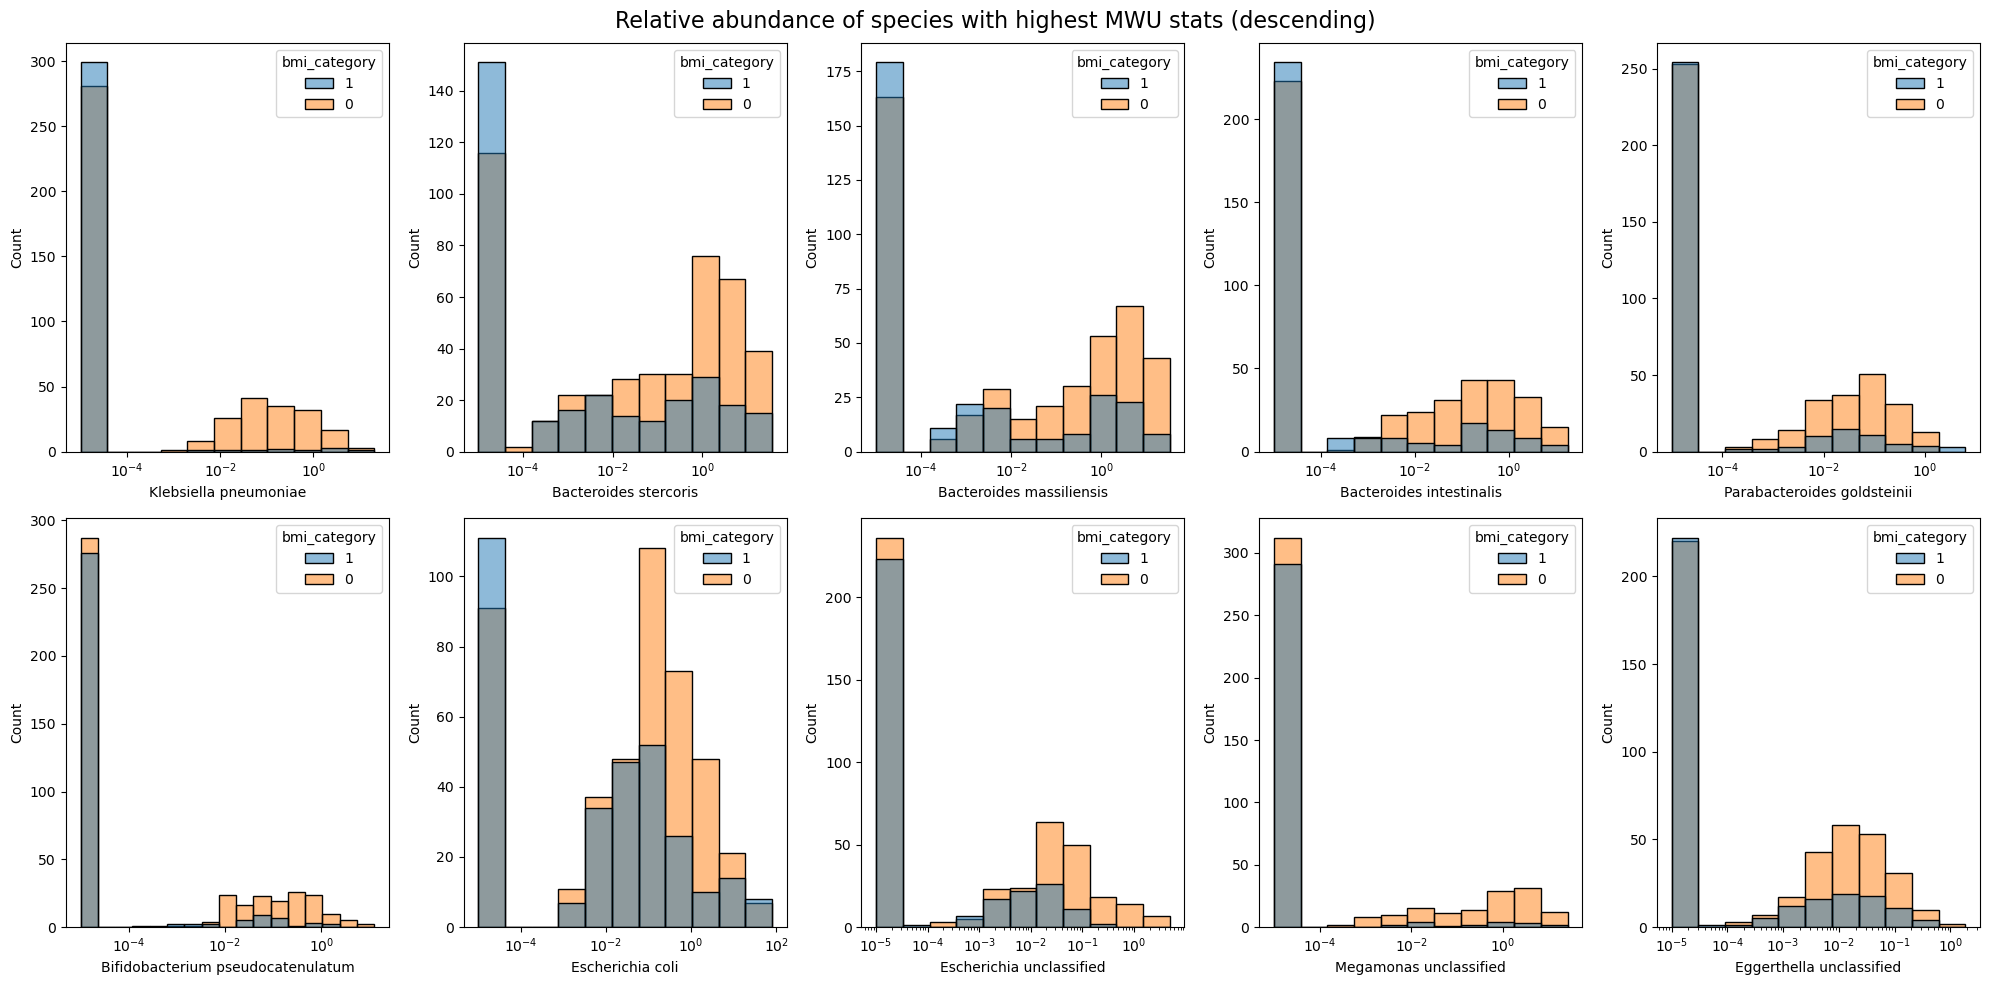

In [10]:

fig = plt.figure(figsize=(20,10), dpi=100)

topSP = mw_sig.index.values[:10]

# add 0.00001 so that data with 0 values don't cause issues when plotting on log scale.
top_subset = pd.concat([(species_data[topSP] + 0.00001), species_data['bmi_category']], axis=1)

for i in range(10):
    fig.add_subplot(2, 5, i+1)
    sns.histplot(data= top_subset, x = topSP[i], hue='bmi_category', log_scale=10)
    # plt.xlim(left = 0.001)

plt.suptitle('Relative abundance of species with highest MWU stats (descending)', fontsize=16)
plt.tight_layout()

I'm not seeing any major differences in the distributions of obese and normal-weight observations in the plots. Some species, like *K. pneumoniae* and *B. stercoris* does appear to be less abundant in obese individuals. Well, I wasn't really expecting a single species to contain much information on whether an individual is obese or not, unless it is some bacteria that grows only in obese individuals and not regular individuals or vice versa. I doubt anything like that ever happens, since being overweight/obese itself is a spectrum, not some condition with a yes/no hard cutoff. 

### Modeling ###

Next to try fitting the data to models. I'll use 2 sets of data: the complete dataset and the feature selected dataset containing only species whose distributions differ between the two categories. Then I'll fit a Random Forest and Gradient Boosting classifier to both sets of data to see which ones gives me better accuracy.

In [11]:
mask = list(mw_sig.index.values) + ['bmi_category']

selected = species_data[mask]

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score

X = selected.iloc[:, 7:selected.shape[1]-1]
y = selected.iloc[:, -1]

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

# scale data based on training set
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

X2 = species_data.iloc[:, 7:species_data.shape[1]-1]
y2 = species_data.iloc[:, -1]

# split data into train and test sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 77)

# scale data based on training set
scaler2 = StandardScaler().fit(x_train2)
x_train2 = scaler2.transform(x_train2)
x_test2 = scaler2.transform(x_test2)


In [13]:
# simple function to output the performance metrics of a model

def model_performance(y_true, y_pred, y_true2, y_pred2):
    '''prints model metrics'''
    from sklearn.metrics import ConfusionMatrixDisplay, classification_report, balanced_accuracy_score

    # print(classification_report(y_true, y_pred))
    # print('balanced accuracy: {0:.4g} \n'.format(metrics.balanced_accuracy_score(y_true, y_pred)))

    fig = plt.figure(figsize=(10,6), dpi=100)

    ax1 = fig.add_subplot(1, 2, 1)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            ax=ax1, display_labels=['normal','obese'], colorbar=False)
    
    accuracy = np.round(metrics.balanced_accuracy_score(y_true, y_pred), 4)
    ax1.set_title("Feature selected dataset \nAccuracy: " + str(accuracy), fontdict={'fontsize':14, 'fontweight':'demibold'}, y=1.05)

    ax2 = fig.add_subplot(1, 2, 2)
    ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2, ax=ax2, 
                                            display_labels=['normal','obese'], colorbar=False)
    
    accuracy2 = np.round(metrics.balanced_accuracy_score(y_true2, y_pred2), 4)
    ax2.set_title("Complete dataset \nAccuracy: " + str(accuracy2), fontdict={'fontsize':14, 'fontweight':'demibold'}, y=1.05)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)


### Random Forest (RF) ###

In [14]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# smaller dataset
forest = RandomForestClassifier(random_state=78)

forest_params = {'n_estimators':randint(0, 50), 'max_features':['sqrt','log2']}

forest_cv = RandomizedSearchCV(forest, forest_params, scoring = 'balanced_accuracy', random_state = 78, n_jobs=6, refit=True).fit(x_train, y_train)

# larger dataset
forest2 = RandomForestClassifier(random_state=78)

forest_params2 = {'n_estimators':randint(0, 50), 'max_features':['sqrt','log2']}

forest_cv2 = RandomizedSearchCV(forest2, forest_params2, scoring = 'balanced_accuracy', random_state = 78, n_jobs=6, refit=True).fit(x_train2, y_train2)


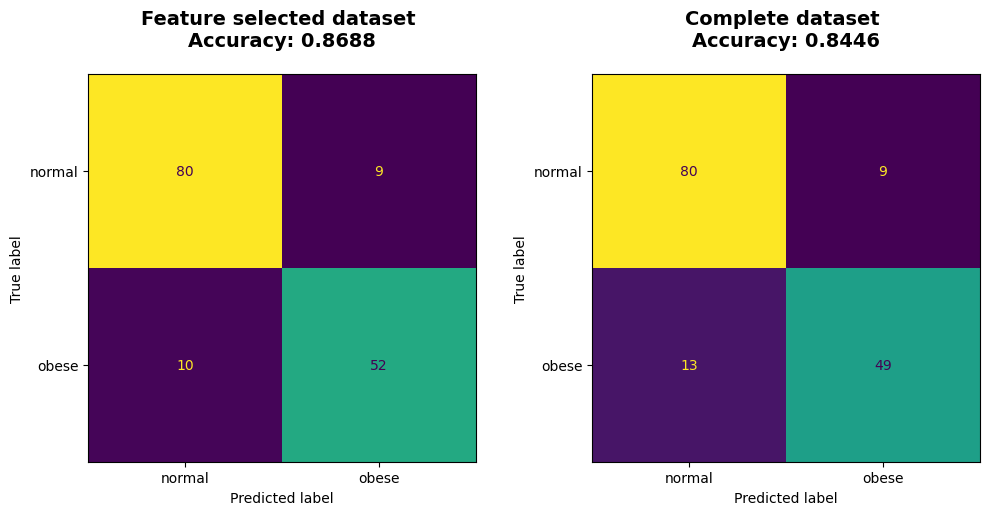

In [15]:
model_performance(y_test, forest_cv.predict(x_test), y_test2, forest_cv2.predict(x_test2))

Pretty good performance! Any differences in accuracy between the models are probably due to random chance, hence feature selection or not doesn't really impact model performance, which is more or less expected as I mentioned earlier. Let's try Gradient Boosting next.

### Gradient Boosting classifier (GB) ###

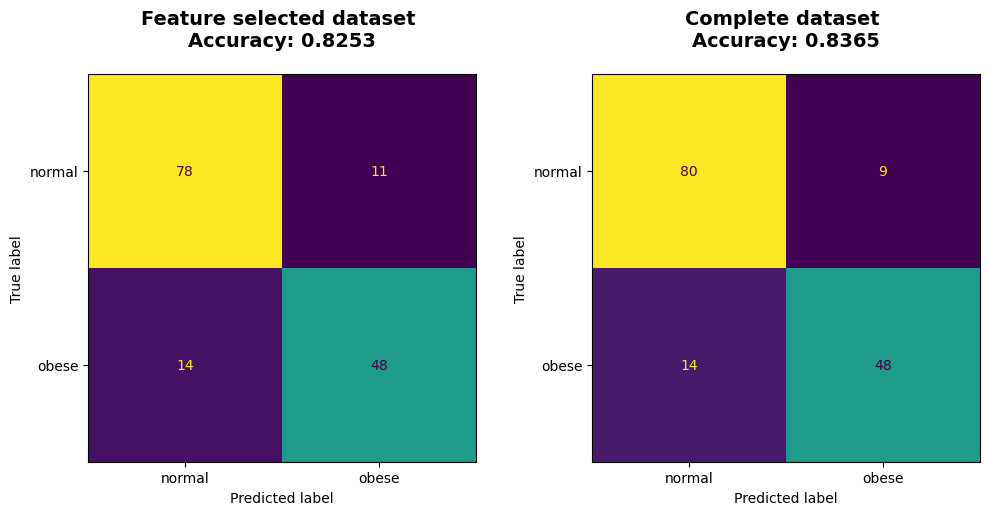

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(random_state=78)

grad_params = {'n_estimators':randint(0, 300)}

grad_cv = RandomizedSearchCV(grad, grad_params, n_jobs=8, random_state = 78, refit=True).fit(x_train, y_train)

grad2 = GradientBoostingClassifier(random_state=78)

grad_params2 = {'n_estimators':randint(0, 300)}

grad_cv2 = RandomizedSearchCV(grad2, grad_params2, n_jobs=8, random_state = 78, refit=True).fit(x_train2, y_train2)


model_performance(y_test, grad_cv.predict(x_test), y_test2, grad_cv2.predict(x_test2))

Again the models have similar performance. 

Next I want to compare the feature importances in the complete dataset RF and GB models with those from the MWU test. I'll just look at the top 30 species and compare them.

In [17]:
# collect feature importance in dataframe
RF_impt = pd.DataFrame({'species':species_data.columns[7:-1],
                     'impt':forest_cv2.best_estimator_.feature_importances_}).sort_values(by='impt', ascending=False)

GB_impt = pd.DataFrame({'species':species_data.columns[7:-1],
                     'impt':grad_cv2.best_estimator_.feature_importances_}).sort_values(by='impt', ascending=False)

# pairwise comparison of common species regarded as important by all 3 models
mw30 = mw_sig.index.values[:30]
mw_GB = [i for i in mw30 if i in list(GB_impt['species'][:30])]
mw_RF = [i for i in mw30 if i in list(RF_impt['species'][:30])]
GB_RF = [i for i in list(GB_impt['species'][:30]) if i in list(RF_impt['species'][:30])]

# find species that are common in all 3 models

print('Pairwise comparison of important features between models\n')
print(f'MWU test and GB: {len(mw_GB)}\n')
print(f'MWU test and RF: {len(mw_RF)}\n')
print(f'RF and GB: {len(GB_RF)}\n')
print(f"Species regarded as important in all three models:\n{set(mw30) & set(GB_impt['species'][:30]) & set(RF_impt['species'][:30])}")

Pairwise comparison of important features between models

MWU test and GB: 7

MWU test and RF: 10

RF and GB: 17

Species regarded as important in all three models:
{'Bacteroides massiliensis', 'Haemophilus parainfluenzae', 'Bacteroides stercoris', 'Klebsiella pneumoniae', 'Bacteroides intestinalis', 'Escherichia unclassified'}


Since all three approaches are based on different methodologies and it shouldn't be surprising that they disagree. What's more interesting are the 5 species regarded as important in all 3 models, meaning that their distribution should differ quite a lot between normal and obese individuals, so let's take a look:

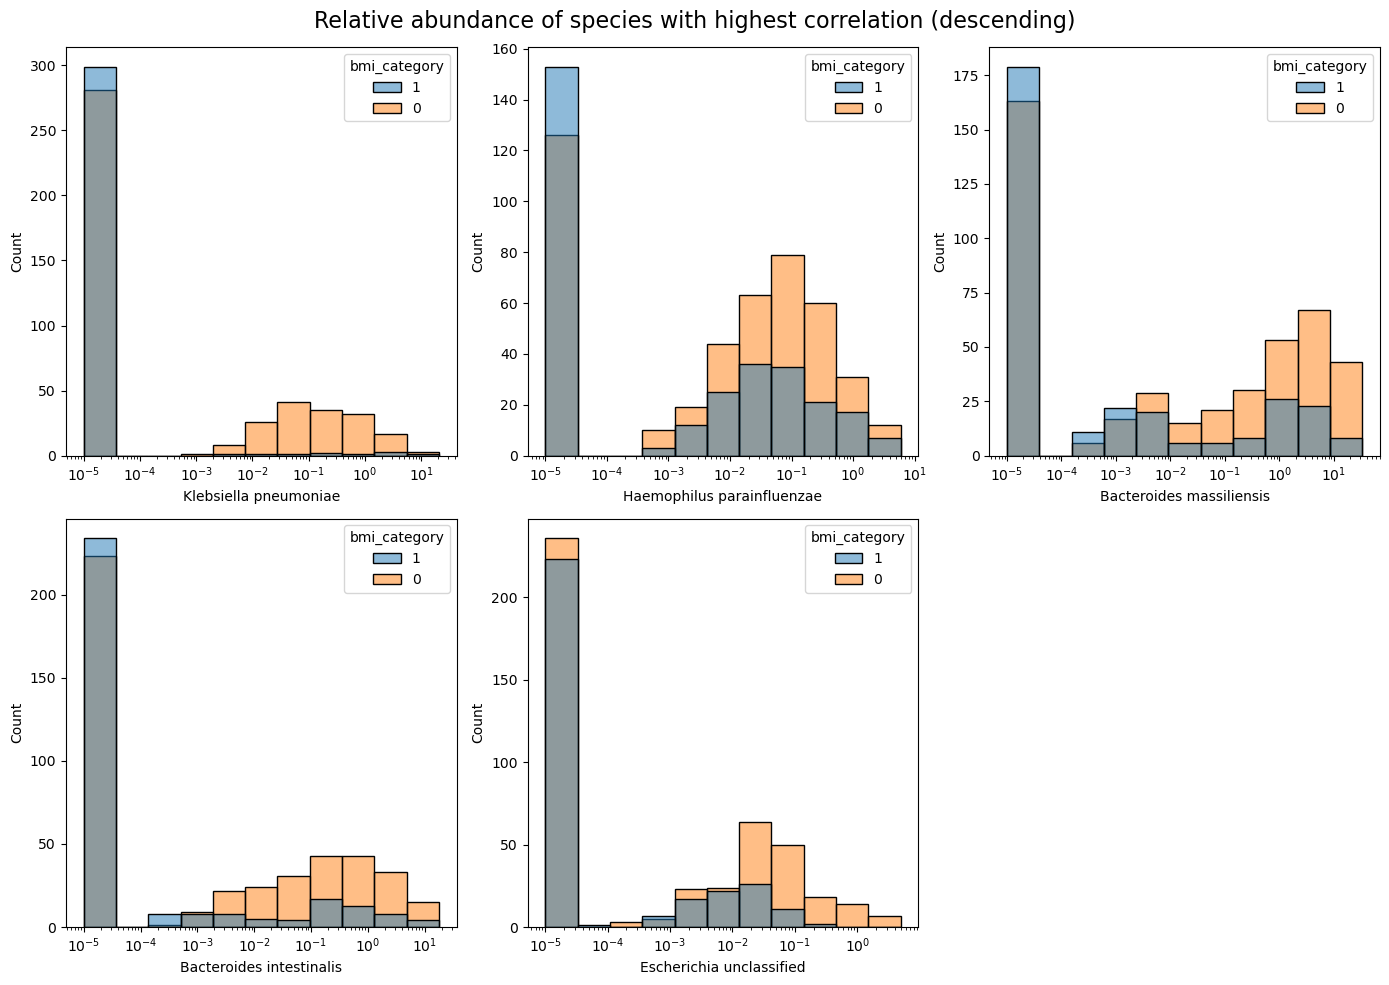

In [18]:
fig = plt.figure(figsize=(14,10), dpi=100)

common = ['Klebsiella pneumoniae', 'Haemophilus parainfluenzae', 'Bacteroides massiliensis', 'Bacteroides intestinalis', 'Escherichia unclassified', 'Bacteroides stercoris']

# add 0.00001 so that data with 0 values don't cause issues when plotting on log scale.
subset = pd.concat([(species_data[common] + 0.00001), species_data['bmi_category']], axis=1)

for i in range(5):
    fig.add_subplot(2, 3, i+1)
    sns.histplot(data= subset, x = common[i], hue='bmi_category', log_scale=10)
    # plt.xlim(left = 0.001)

plt.suptitle('Relative abundance of species with highest correlation (descending)', fontsize=16)
plt.tight_layout()

Like with the earlier plots, it does seem like these species of bacteria are more abundant in normal individuals. As a curious, final note, both *K. pneumoniae* and *H. parainfluenzae* are normal flora that are opportunistic pathogens. Unfortunately, I'm not knowledgeable in the field of gut microbiome to know if this means anything. 

A brief google did bring up some some studies that show *K. pneumoniae* is enriched in lean individuals [[1]](https://pubmed.ncbi.nlm.nih.gov/26261039/) and increases following gastic bypass weight loss [[2]](https://pubmed.ncbi.nlm.nih.gov/27306058/). 

But that's another rabbit hole for another day
